## Task A1. Baseline case (worth approximately 12% of the marks)
**Assignment:** Using Python, solve the deterministic SIR model numerically and examine the solution for one set of parameter values and one initial condition. Then, adapt the code to rerun the analysis multiple times for different infection rates.

Details: 
- Use the following parameter values for the baseline case (where, throughout this Assignment, time is measured in days): $\beta = 2 \times 10^{-5}$, $\mu = 0.1$, $N = 10^{4}$.
- Initiate the numerical solution starting with 3 infected individuals, with the remainder of the population susceptible.
- Produce two plots: a time-series showing $S(t)$, $I(t)$ and $R(t)$ and a phase plane (in the $(S,I)$ plane).
- On both plots, indicate the point on the trajectory where $I$ reaches its maximum as black circles, and print this maximum value (when you print the value, round this value to the largest integer that is less than this value).
- Now repeat this analysis a large number of times for different values of $\beta$ (without generating a figure each time; so as to not generate a huge number of figures!) Plot the maximum value of $I$ as a function of $\beta$, choosing an appropriate range of values of $\beta$ (and sufficiently many values) to be able to see the dependence clearly.

Hint: You might like to Google the appropriate NumPy function that finds the maximum value in a vector. For the last part, use a FOR loop rather than changing the value of $\beta$ manually.

Once you have completed this, you might like to help your team member who is doing Task A4 below!

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

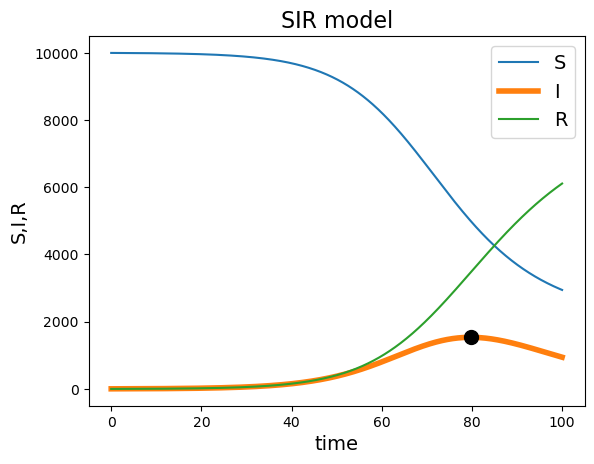

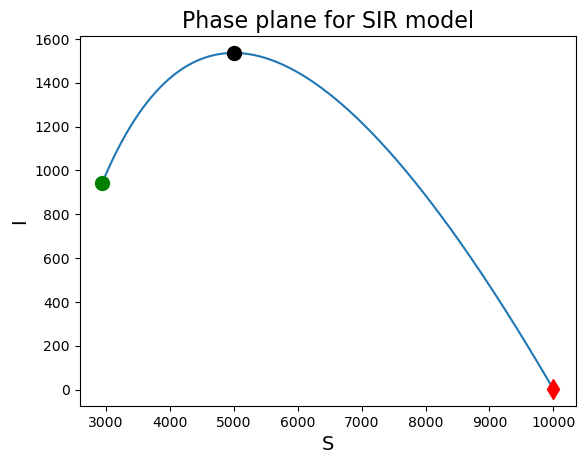

Maximum I (floor): 1535


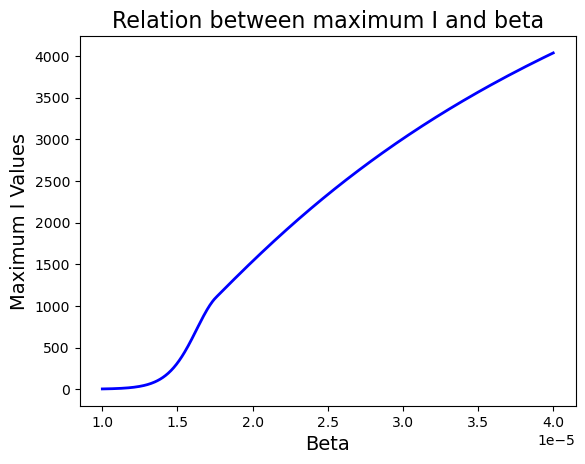

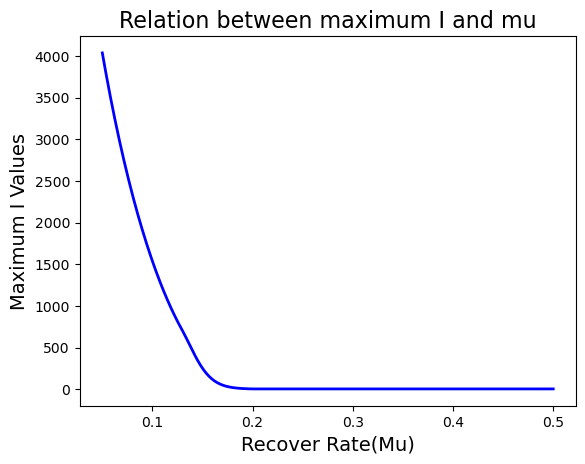

In [7]:
#import libraries 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint #To solve differential equations

#Define the differential equations for SIR Model
def SIR(y, t, beta, mu):
    S, I, R = y
    N = S + I + R #Total poluation N is constant over time
    Sdot = -beta * S * I #Rate of change of susceptible population is negative and is proportional to the susceptible population and the infectious population. Beta is the rate of infection.
    Idot = beta * S * I - mu * I #rate of change of infectious population= rate of change of susceptible population - rate of change of recovered population.
    Rdot = mu * I #rate of change of recovered population is proportional to the infectious population. Mu is the rate of removal.
    return Sdot, Idot, Rdot

#Set up time grid for the solution
tf = 100
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)
#Initial conditions and put into array y0
S0 = 10**4 - 3
I0 = 3
R0 = 0
y0 = np.array([S0, I0, R0])
beta0 = 2e-5
mu0 = 0.1

#Solve the SIR Model
y_sol = odeint(SIR, y0, t, args=(beta0, mu0)) #Use args to pass additional arguments beta and mu into the function
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

#Find out the maximum infection point
t_max = t[np.argmax(I)] #Instead of using max() function, using argmax() function to find out the indice of maximum I since we also need to find out the corresponding susceptible population value and time t.
S_max = S[np.argmax(I)]
I_max = I[np.argmax(I)]
max_I_floor = int(np.floor(I_max)) #Use floor function to determine the largest integer less than this value and use int() function to make sure it is the form of integer.

#Plot time series 
plt.plot(t, S, label = "S")
plt.plot(t, I, lw = 4, label = "I")
plt.plot(t, R, label = "R")
plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)
plt.plot(t_max, I_max, 'ko', markersize=10) #mark the maximum I point
plt.title("SIR model", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()        

#Plot Phase Plane
plt.plot(S, I)
plt.xlabel("S", fontsize = 14)
plt.ylabel("I", fontsize = 14)
plt.plot(S_max, I_max, 'ko', markersize=10) #mark the maximum I point 
plt.title("Phase plane for SIR model", fontsize = 16)

plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
plt.show()

print(f"Maximum I (floor): {max_I_floor}") #Print the maximum value of I (rounded to the largest integer less than this value)

#Beta values vary from 1e-5 to 4e-5
beta_values = np.linspace(1e-5, 4e-5, 500)  
max_I_values_1 = [] #use this list to store the maximum I value for each beta 

#Use for loop to iterate over a range of beta values 
for beta in beta_values:
    y_sol = odeint(SIR, y0, t, args=(beta, mu0))
    I = y_sol[:,1]
    max_I_values_1.append(np.max(I)) #use append() function to add this maximum I value for each beta to the end of the list max_I_values_1

#Plot the maximum value of I as a function of beta 
plt.plot(beta_values, max_I_values_1, 'b-', lw=2)
plt.xlabel('Beta', fontsize=14)
plt.ylabel('Maximum I Values', fontsize=14)
plt.title('Relation between maximum I and beta', fontsize=16)
plt.show()

#Mu values vary from 0.05 to 0.5
mu_values = np.linspace(0.05, 0.5, 500)  
max_I_values_2 = [] #use this list to store the maximum I value for each mu

#Use for loop to iterate over a range of mu values 
for mu in mu_values:
    y_sol = odeint(SIR, y0, t, args=(beta0, mu))
    I = y_sol[:,1]
    max_I_values_2.append(np.max(I)) #use append() function to add this maximum I value for each mu to the end of the list max_I_values_2

#Plot the maximum value of I as a function of mu 
plt.plot(mu_values, max_I_values_2, 'b-', lw=2)
plt.xlabel('Recover Rate(Mu)', fontsize=14)
plt.ylabel('Maximum I Values', fontsize=14)
plt.title('Relation between maximum I and mu', fontsize=16)
plt.show()